# ***Part I. One-sided finite differences***

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [3]:
#Python 3

import numpy as np 
import math 
import matplotlib.pyplot as plt 

%matplotlib inline 

#Compute a derivative of `f` at point `x` with step size `h`.
    
   #Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    #Parameters
    #----------
    #f : callable
        #The function to differentiate
    #x : float
        #The point to compute the derivative at.
    #h : float
        #The step size for the finite different rule.
        
    #Returns
    #-------
    #fder : derivative of f(x) at point x using the step size h.

def deriv(f, x, h):

  dev_1 = (f(x + 0.5 * h) - f(x)) / (0.5 * h)
  dev_2 = (f(x + h) - f(x)) / h
    
  return 2 * dev_1 - dev_2



#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [4]:
x = 1
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 --       3
0.001000 --       3
0.000100 --       3
0.000010 --       3


This just follows rule accordingly, h is near 0 as it got smaller each time.

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [ ]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

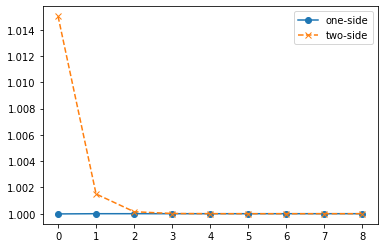

In [ ]:
def two_point_deriv(f, x, h): 
    f_plus = f(x + h)
    f0 = f(x)
    
    return (f_plus - f0) / h

x = 1
point_1, point_2 = [], [] 
for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]:
    point_2.append(two_point_deriv(f, x, h))
    point_1.append(deriv(f, x, h))
    

nb = len(point_1)
plt.plot(np.arange(nb), np.array(point_1), 'o-', label='one-side')
plt.plot(np.arange(nb), np.array(point_2), 'x--', label='two-side')
plt.legend()    

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [ ]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.006931
0.001000 -- -0.0006931
0.000100 -- -6.931e-05
0.000010 -- -6.931e-06


We must realize errors will converge when h is approaching (or near to) 0. This is because the derivative of f is $(2 * log(x) + 1) * x$

The derivative term will dominated by x. 

# ***Part II. Midpoint rule***

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [6]:
#Python 3

from scipy.integrate import quad 

#Calculate the integral of f from a to b using the midpoint rule.
    
    #Parameters
    #----------
    #func : callable
        #The function to integrate.
    #a : float
        #The lower limit of integration.
    #b : float
        #The upper limit of integration.
    #eps : float
        #The target accuracy of the estimate.
        
    #Returns
    #-------
    #integral : float
        #The estimate of $\int_a^b f(x) dx$.

def midpoint_rule(func, a, b, eps):
  
    N, pre, err = 10, 10, 10
    
    while err > eps: 
        h = (b - a) / N 
        res = 0
        
        for i in range(N - 1): 
            res += func(a + i * h + h / 2) * h
            
        err = abs(pre - res)
        pre = res
        
        N *= 2 
        
    return res 

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [7]:
# Paper and Pencil Solution 

f = lambda x: x**4
a, b = 0, 1
result = quad(f, a, b)[0]
print(result)

0.2


In [ ]:
# Contructed Solution

EPS = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

for eps in EPS: 
    result_app = midpoint_rule(f, a, b, eps)
    print(result_app, '\t', result_app - result)

0.24380352802276622 	 -0.006196471977233775
0.24921958887581702 	 -0.0007804111241829781
0.24990235686232348 	 -9.764313767651744e-05
0.24999389653559848 	 -6.103464401524539e-06
0.24999923706134533 	 -7.62938654669254e-07


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [9]:
# Pencil and Paper Solution

f = lambda x: math.sin(math.sqrt(x)) / x 
f_modify = lambda x: f(x) - 1 / math.sqrt(x)
result = quad(f, a, b)[0]
print(result)

1.8921661407343815


In [10]:
# Contructed Solution

eps = 1e-5
result_app = midpoint_rule(f, a, b, eps)

print(result_app, '\t', result_app - result)

KeyboardInterrupt: ignored

In [ ]:
# Constructed Mid-Solution

result_mdy = midpoint_rule(f_modify, a, b, eps) + 2

print(result_mdy, '\t', result_mdy - result)

1.8922279827958923 	 6.18420615108306e-05
